In [1]:
import numpy as np 
import pandas as pd 
import warnings 
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.special import jn 
from IPython.display import display, clear_output
import time
warnings.filterwarnings('ignore') 


In [2]:
DATA_FREFIX = '/Users/gongbin/data/数据竞赛/天池__二手乘用车'
TRAIN_FILE = 'used_car_train_20200313.csv'
TEST_FILE = 'used_car_testA_20200313.csv'

In [3]:
train_data = pd.read_csv('/'.join([DATA_FREFIX, TRAIN_FILE]),sep = ' ', index_col = 'SaleID')
test_data = pd.read_csv('/'.join([DATA_FREFIX, TEST_FILE]),sep = ' ', index_col = 'SaleID')

In [4]:
train_data.head()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
SaleID,,,,,,,,,,,,,,,,,,,,,
0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 30 columns):
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4                  150000 non-null float64
v_5     

 - name - 汽车编码 
 regDate - 汽车注册时间 
 model - 车型编码 brand - 品牌 bodyType - 车身类型 fuelType - 燃油类型 gearbox - 变速箱 power - 汽车功率 kilometer - 汽车行驶公里 notRepairedDamage - 汽车有尚未修复的损坏 regionCode - 看车地区编码 seller - 销售方 offerType - 报价类型 creatDate - 广告发布时间 price - 汽车价格 v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评 论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】

In [6]:
train_data.describe()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


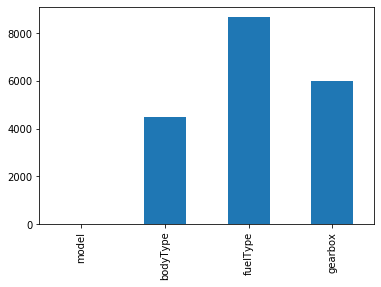

In [7]:
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.plot.bar()

In [8]:
train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

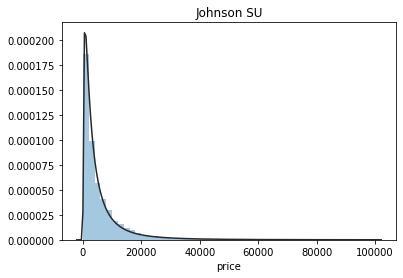

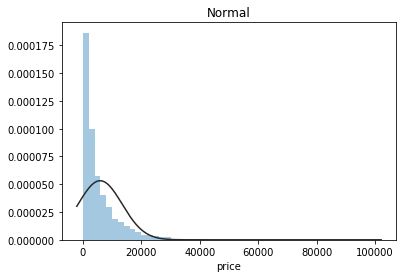

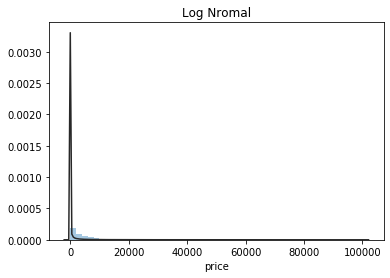

In [12]:
## 1) 总体分布概况（无界约翰逊分布等） 
import scipy.stats as st 
y = train_data['price']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde =False, fit =st.johnsonsu) 
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde =False, fit =st.norm)  
plt.figure(3)
plt.title('Log Nromal')
sns.distplot(y, kde=False, fit=st.lognorm)

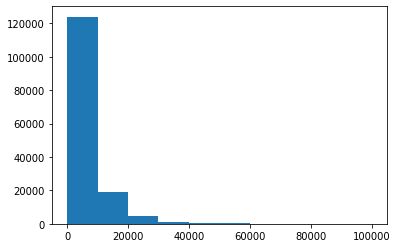

In [13]:
plt.hist(train_data['price'], orientation='vertical', histtype='bar')
plt.show()

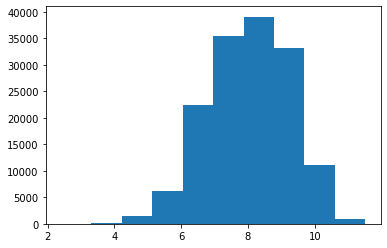

In [14]:
plt.hist(np.log(train_data['price']), orientation='vertical', histtype='bar')
plt.show()

In [15]:
numeric_features = train_data.select_dtypes(include = [np.number])
numeric_features.columns

Index(['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'regionCode', 'seller', 'offerType', 'creatDate',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [16]:
numeric_features = ['power', 'kilometer', 'regionCode','v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8','v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox','notRepairedDamage', 'regionCode']